<ipython-input-6-c7aef7cd68b6>:13: RuntimeWarning: overflow encountered in exp
  densidad = intensidad / (np.exp(beta * h * c / wave) - 1)


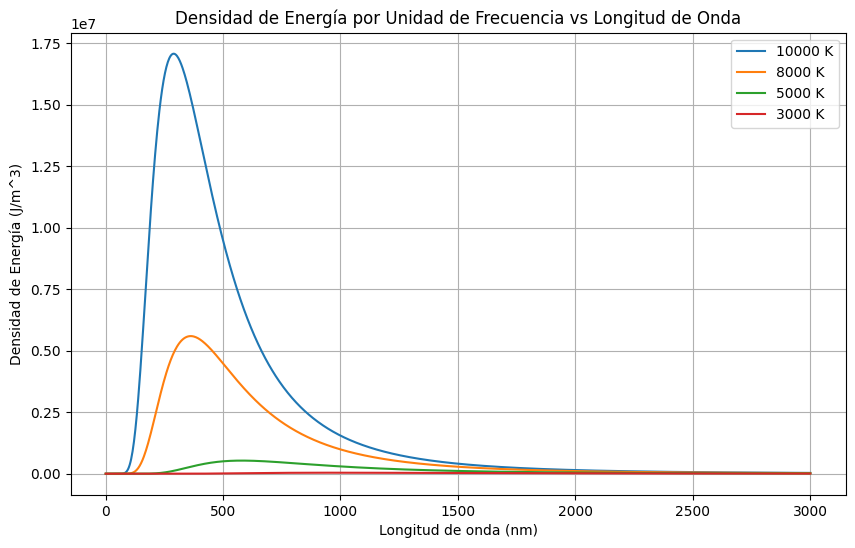

In [6]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34
c = 3.0e8
k = 1.38e-23
onda= np.linspace(1e-9, 3e-6, 1000)
temperaturas = [10000, 8000, 5000, 3000]

def densidad_energia(wave, t):
    beta = 1 / (k * t)
    intensidad= (8 * np.pi * h * c) / (wave**5)
    densidad = intensidad / (np.exp(beta * h * c / wave) - 1)
    return densidad

plt.figure(figsize=(10, 6))
for temp in temperaturas:
    densidad = densidad_energia(onda, temp)
    plt.plot(onda * 1e9, densidad, label=f'{temp} K')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Densidad de Energía (J/m^3)')
plt.title('Densidad de Energía por Unidad de Frecuencia vs Longitud de Onda')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-7-2b615782cfa3>:13: RuntimeWarning: overflow encountered in exp
  densidad = intensidad / (np.exp(beta * h * c / wave) - 1)


A 10000 K, la longitud de onda en el pico es 289.19 nm, que corresponde a la parte del espectro Ultravioleta.
A 8000 K, la longitud de onda en el pico es 361.24 nm, que corresponde a la parte del espectro Ultravioleta.
A 5000 K, la longitud de onda en el pico es 580.39 nm, que corresponde a la parte del espectro Visible.
A 3000 K, la longitud de onda en el pico es 967.64 nm, que corresponde a la parte del espectro Infrarrojo cercano.


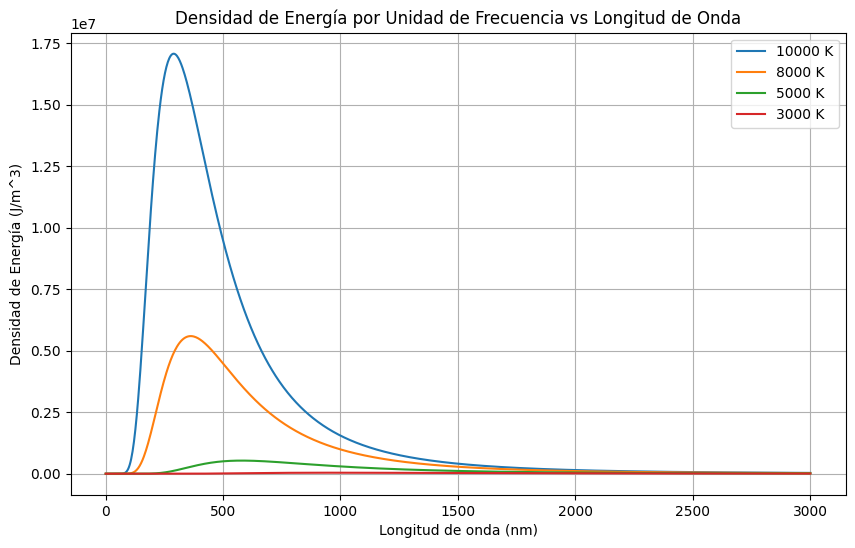

In [7]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34
c = 3.0e8
k = 1.38e-23
onda= np.linspace(1e-9, 3e-6, 1000)
temperaturas = [10000, 8000, 5000, 3000]

def densidad_energia(wave, t):
    beta = 1 / (k * t)
    intensidad= (8 * np.pi * h * c) / (wave**5)
    densidad = intensidad / (np.exp(beta * h * c / wave) - 1)
    return densidad
pico_wave = []
espectros = []

for temp in temperaturas:
    density = densidad_energia(onda, temp)
    peak= onda[np.argmax(density)]
    peak_nm = peak * 1e9

    if 0.01 <= peak_nm < 400:
        part = "Ultravioleta"
    elif 400 <= peak_nm < 700:
        part = "Visible"
    elif 700 <= peak_nm < 1000:
        part = "Infrarrojo cercano"
    else:
        part = "Infrarrojo lejano"

    pico_wave.append(peak_nm)
    espectros.append(part)

for i in range(len(temperaturas)):
    print(f"A {temperaturas[i]} K, la longitud de onda en el pico es {pico_wave[i]:.2f} nm, que corresponde a la parte del espectro {espectros[i]}.")

plt.figure(figsize=(10, 6))
for temp in temperaturas:
    density = densidad_energia(onda, temp)
    plt.plot(onda * 1e9, density, label=f'{temp} K')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Densidad de Energía (J/m^3)')
plt.title('Densidad de Energía por Unidad de Frecuencia vs Longitud de Onda')
plt.legend()
plt.grid(True)
plt.show()


Error máximo: 154089.28%
Error promedio: 18240.05%


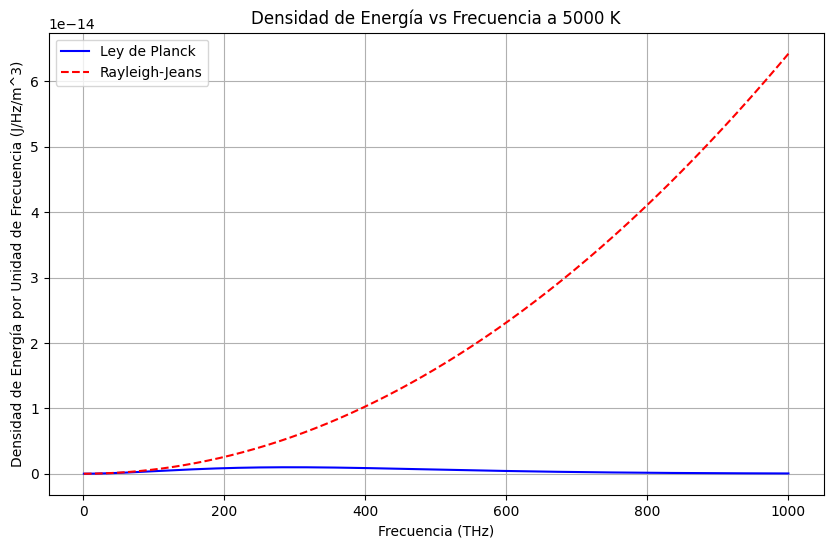

In [8]:
import numpy as np
import matplotlib.pyplot as plt
h = 6.626e-34
c = 3.0e8
k = 1.38e-23

frequencias = np.linspace(1e12, 1e15, 1000)
temperatura = 5000

def energy_density(frec, temperatura):
    beta = 1 / (k * temperatura)
    densidad = (8 * np.pi * h * frec**3) / (c**3 * (np.exp(beta * h * frec) - 1))
    return densidad

def rayleigh_jeans(frec, temperatura):
    densidad = (8 * np.pi * frec**2 * k * temperatura) / c**3
    return densidad

densidad_planck = energy_density(frequencias, temperatura)
densidad_rj = rayleigh_jeans(frequencias, temperatura)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(frequencias / 1e12, densidad_planck, label='Ley de Planck', color='blue')
plt.plot(frequencias / 1e12, densidad_rj, label='Rayleigh-Jeans', color='red', linestyle='--')

plt.xlabel('Frecuencia (THz)')
plt.ylabel('Densidad de Energía por Unidad de Frecuencia (J/Hz/m^3)')
plt.title(f'Densidad de Energía vs Frecuencia a {temperatura} K')
plt.legend()
plt.grid(True)

error = np.abs((densidad_planck - densidad_rj) / densidad_planck) * 100
max_error = np.max(error)
mean_error = np.mean(error)

print(f"Error máximo: {max_error:.2f}%")
print(f"Error promedio: {mean_error:.2f}%")

plt.show()
